# Time Series Forecasting

##  Univariate Time Series Analysis/Forecasting. - one variable

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('daily-minimum-temperatures.csv',header=0,names=['date','temperature'])

In [3]:
data.tail()


,date,temperature
3645,12/27/1990,14.0
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7
3649,12/31/1990,13.0


In [4]:
data.dtypes

date            object
temperature    float64
dtype: object

In [5]:
data['temperature'] = data['temperature'].astype(float)

In [7]:
data.dtypes

date            object
temperature    float64
dtype: object

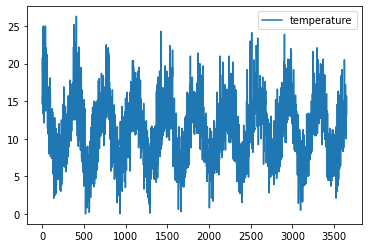

In [6]:
data.plot()
plt.show()

### Here the pattern is seasonal 

## Multi-variate Time Series -more than one time-dependent variable

In [10]:
from pandas import read_csv
from datetime import datetime

def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

dataset = read_csv('raw.csv',  parse_dates = [['year', 'month', 'day', 'hour']],
                   index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)


dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'


dataset['pollution'].fillna(0, inplace=True)


dataset = dataset[24:]


print(dataset.head(5))

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


In [11]:
values = dataset.values
values

array([[129.0, -16, -4.0, ..., 1.79, 0, 0],
       [148.0, -15, -4.0, ..., 2.68, 0, 0],
       [159.0, -11, -5.0, ..., 3.57, 0, 0],
       ...,
       [10.0, -22, -3.0, ..., 242.7, 0, 0],
       [8.0, -22, -4.0, ..., 246.72, 0, 0],
       [12.0, -21, -3.0, ..., 249.85, 0, 0]], dtype=object)

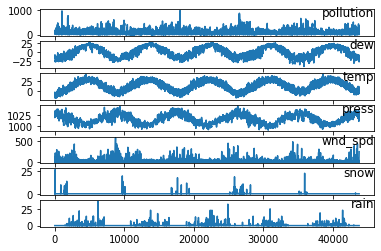

In [12]:
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1

# plot each column
plt.figure()

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
    
plt.show()

### We have created a plot with 7 subplots showing the 5 years of data for each variable.

# Trend data

In [33]:
IndiaGDP = pd.read_csv('GDPIndia.csv', header=0)

date_rng = pd.date_range(start='1/1/1960', end='31/12/2017', freq='A')

IndiaGDP['TimeIndex'] = pd.DataFrame(date_rng, columns=['Year'])
IndiaGDP.head(5).T

,0,1,2,3,4
Year,1960,1961,1962,1963,1964
GDPpercapita,81.2848,84.4264,88.9149,100.049,114.315
TimeIndex,1960-12-31 00:00:00,1961-12-31 00:00:00,1962-12-31 00:00:00,1963-12-31 00:00:00,1964-12-31 00:00:00


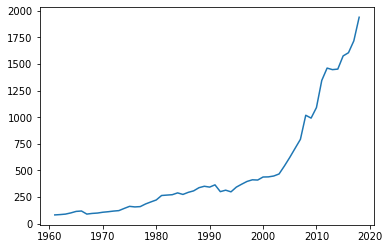

In [34]:
plt.plot(IndiaGDP.TimeIndex, IndiaGDP.GDPpercapita)
plt.show()

In [35]:
import pickle

with open('GDPIndia.obj', 'wb') as fp:
        pickle.dump(IndiaGDP, fp)

In [36]:
### Retrieve the pickle object

with open('GDPIndia.obj', 'rb') as fp:
     IndiaGDP1 = pickle.load(fp)
        
IndiaGDP1.head(5).T

,0,1,2,3,4
Year,1960,1961,1962,1963,1964
GDPpercapita,81.2848,84.4264,88.9149,100.049,114.315
TimeIndex,1960-12-31 00:00:00,1961-12-31 00:00:00,1962-12-31 00:00:00,1963-12-31 00:00:00,1964-12-31 00:00:00


# Decomposition of Time Series: Additive and Multiplicative model		

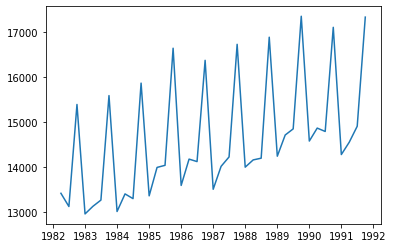

In [43]:
from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
import  statsmodels
from    statsmodels.tsa.seasonal import   seasonal_decompose
from    datetime                 import   datetime
import  statsmodels.api          as       sm

Turnover              = pd.read_csv('RetailTurnover.csv')
date_rng              = pd.date_range(start='1/7/1982', end='31/3/1992', freq='Q')
Turnover['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
Turnover.head()

plt.plot(Turnover.TimeIndex, Turnover.Turnover)
plt.show()

c:\users\vikee\anaconda3\envs\nlpproj\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


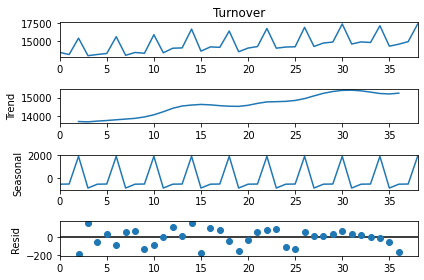

In [44]:
decompTurnover = sm.tsa.seasonal_decompose(Turnover.Turnover, model="additive", freq=4)
decompTurnover.plot()
plt.show()

# Exponential Smoothing

In [48]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error


def parser(x):
       return pd.datetime.strptime(x, '%Y')

series  =  pd.read_csv('oildata.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True, date_parser = parser)
print('Data range : ',  len(series))


Data range :  12


c:\users\vikee\anaconda3\envs\nlpproj\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  # Remove the CWD from sys.path while we load stuff.


In [49]:
series.head()

Year
1996-01-01    445.364098
1997-01-01    453.195010
1998-01-01    454.409641
1999-01-01    422.378906
2000-01-01    456.037122
Name:  Quantity, dtype: float64

In [50]:
pred = ets.ExponentialSmoothing(series, trend = None, damped = False, seasonal = None).fit()
print('')
print('== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==')
print('')
print('Smoothing Level', np.round(pred.params['smoothing_level'], 4))
print('Initial Level', np.round(pred.params['initial_level'], 4))
print('')
y_pred = pred.forecast(steps = 3)
y_pred = pd.DataFrame(y_pred)
y_pred


== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==

Smoothing Level 0.7955
Initial Level 446.7952



c:\users\vikee\anaconda3\envs\nlpproj\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  """Entry point for launching an IPython kernel.
c:\users\vikee\anaconda3\envs\nlpproj\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\vikee\anaconda3\envs\nlpproj\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


,0
2008-01-01,493.281894
2009-01-01,493.281894
2010-01-01,493.281894


In [51]:
y_pred1    =  pred.predict(start = series.index[0])

rmse       =  np.sqrt(mean_squared_error(series, y_pred1))
print('RMSE is %3.4f'  %rmse)

RMSE is 24.7839


# Double Exponential Smoothing


In [52]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt

In [53]:
Petrol=pd.read_csv('Petrol.csv')

In [54]:
Petrol.head()

,Year,Quarter,Consumption
0,2001,Q1,14.978
1,2001,Q2,11.099
2,2001,Q3,10.057
3,2001,Q4,10.454
4,2002,Q1,9.295


In [58]:
model = Holt(np.asarray(Petrol['Consumption']))

model_fit = model.fit()

print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
print('Smoothing Level', alpha_value )
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')



==Holt model Exponential Smoothing Parameters ==

Smoothing Level 1.0
Initial Level 15.263

